In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
df_usa = df[df['job_country'] == 'United States'].copy(deep=True)

In [5]:
df_usa['job_posted_month'] = df_usa['job_posted_date'].dt.strftime("%B")

In [31]:
df_usa_pivot = df_usa.pivot_table(index='job_posted_month', columns='job_title_short',aggfunc='size')

In [89]:
df_usa_pivot.reset_index(inplace=True)

In [91]:
df_usa_pivot['month_no']=pd.to_datetime(df_usa_pivot["job_posted_month"], format='%B').dt.month

In [92]:
df_usa_pivot.set_index("job_posted_month", inplace=True)

In [94]:
df_usa_pivot.sort_values('month_no',ascending=True, inplace=True)

In [100]:
df_usa_pivot.drop('month_no',inplace=True,axis=1)

In [96]:
df_usa_pivot.index.name

'job_posted_month'

In [33]:
df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112
August,903,39,6634,3269,6318,68,1186,903,1515,194
December,648,40,3979,2641,3472,119,601,689,752,212
February,447,24,6124,3060,4956,56,1258,878,1127,90
January,527,36,8494,2655,6915,60,1544,773,1552,114
July,581,39,5201,2570,4876,65,883,747,1095,153
June,446,32,5683,2893,4645,48,1009,812,1033,93
March,438,19,6218,3183,4779,59,1114,829,1150,115
May,279,20,4993,2976,4377,49,839,746,914,90


In [175]:
df_usa['job_title_short'].value_counts().sort_values(ascending=False).head(3)

job_title_short
Data Analyst      67816
Data Scientist    58830
Data Engineer     35080
Name: count, dtype: int64

In [170]:
top_3 = df_usa['job_title_short'].value_counts().sort_values(ascending=False).head(3).index.to_list()

In [171]:
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

In [172]:
df_usa_pivot[top_3]

job_title_short,Data Analyst,Data Scientist,Data Engineer
job_posted_month,,,
January,8494,6915,2655
February,6124,4956,3060
March,6218,4779,3183
April,6049,4867,2801
May,4993,4377,2976
June,5683,4645,2893
July,5201,4876,2570
August,6634,6318,3269
September,4639,4568,3224


<Axes: xlabel='job_posted_month'>

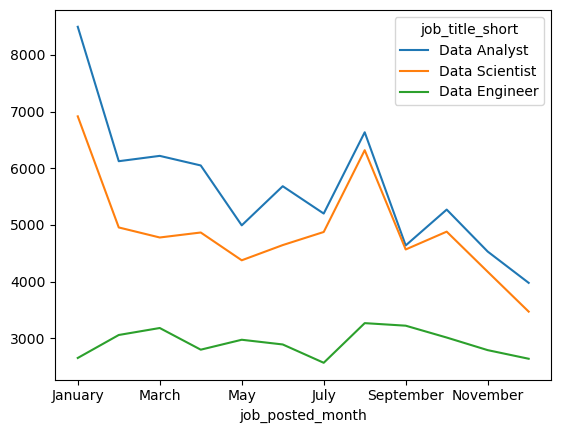

In [173]:
df_usa_pivot[top_3].plot(kind='line')

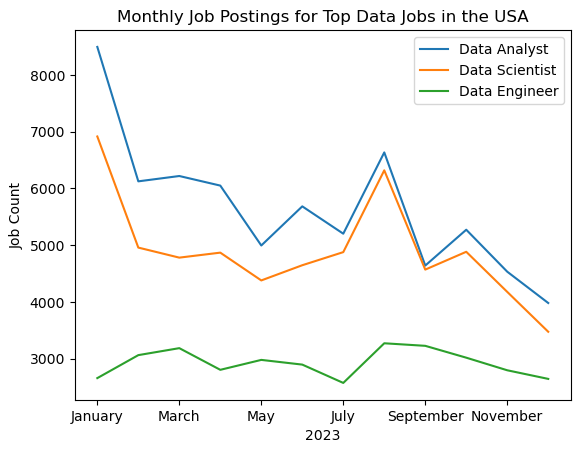

In [174]:
df_usa_pivot[top_3].plot(kind='line')
plt.title("Monthly Job Postings for Top Data Jobs in the USA")
plt.ylabel("Job Count")
plt.xlabel("2023")
plt.legend(title='')
plt.show()

In [29]:
from time import strptime
def sort_chronologically(idx):
  return idx.map(lambda m: strptime(m,'%B').tm_mon)

df_usa_pivot.sort_index(key=sort_chronologically,inplace=True)


In [30]:
df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228
